In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import h5py

## create known temp conv dependent dataset

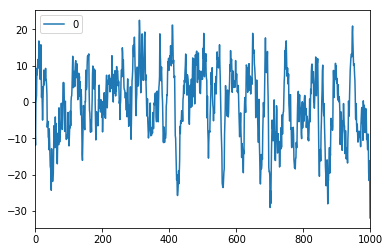

In [2]:
X = np.random.uniform(-100,100,size=(1000,4))

y = []
for idx in range(X.shape[0]):
    y.append(np.mean(X[idx:idx+10, :]))

y = np.array(y)
df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y)
df_y.plot()

In [60]:
X_file = h5py.File('datasets/synth_X', 'w')
X_file.create_dataset('X', data=X)
X_file.close()

y_file = h5py.File('datasets/synth_y', 'w')
y_file.create_dataset('y', data=y)
y_file.close()

In [80]:
results = [[[-46], [-0.00033001888554462511], [0.0079058435791577366]], [[-43], [-0.00024839384290542554], [0.015434315808634642]], [[-40], [-0.0011026954103199316], [-0.0078096754043511735]], [[-37], [0.19057140756546376], [0.43743297558507849]], [[-34], [0.49069539642278526], [0.70680916331509058]], [[-31], [0.85500364584074007], [0.92644403883415027]], [[-28], [0.93404038781432241], [0.97086116469050865]], [[-25], [0.94346926139117482], [0.97329165806350726]], [[-22], [0.94018445730759137], [0.9752624242823924]], [[-19], [0.94463477520780459], [0.97464426140495808]], [[-16], [0.94359970007045546], [0.9753551986425012]], [[-13], [0.77614225403576942], [0.88558049218571377]], [[-10], [0.39384627194201294], [0.63460116187846105]], [[-7], [0.073392921617480567], [0.27477530890235202]], [[-4], [-0.002925351424245326], [0.0020718298960015055]], [[-1], [-0.00019235651064897219], [0.0075112785193127149]], [[2], [-0.0039174108164599097], [-0.0034893588652488063]], [[5], [-0.0021085444753679017], [-0.0012451337998710173]], [[8], [-0.0020451655736886121], [-0.016741583520067431]], [[11], [-0.00085608593015629175], [-0.011813925977228109]], [[14], [-0.00067299857685099163], [-0.0071313312043455113]], [[17], [-0.00089263012372930994], [-0.017527757569746671]], [[20], [-0.004994459307342991], [-0.017046285666178135]], [[23], [-0.0023779891877555581], [-0.016120420754651209]], [[26], [-0.001734858104143866], [-0.01788280469474646]], [[29], [-0.0040087164197131209], [-0.020668259156562251]], [[32], [-0.0043816330095525213], [-0.013412122902656587]], [[35], [-0.0010414733004637799], [0.0091452523355209665]], [[38], [-0.00073091190414009688], [0.015786059378181727]]]

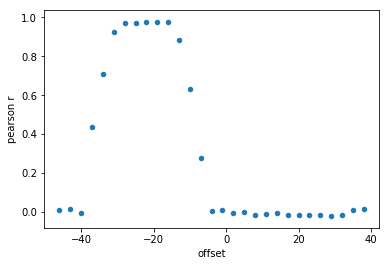

In [81]:
rs = pd.DataFrame({
    'pearson r' : [result[2][0] for result in results],
    'offset' : [result[0][0] for result in results]
})
rs.plot.scatter(x='offset', y='pearson r')

## generate hypothetical dataset breaking temp conv dependence

In [11]:
X = np.random.uniform(-100,100,size=(100000,4))

y = []
for idx in range(X.shape[0]):
    scattered_X = np.array([X[idx+(10*i):idx+(10*(i+1)), i] for i in range(X.shape[1])])
    
    y.append(np.mean(scattered_X))

    
y = np.array(y)
df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y)
df_y.plot()

ValueError: operands could not be broadcast together with shapes (10,) (9,) 

In [14]:
scattered_X = np.array([X[0+(10*i):0+(10*(i+1)), i] for i in range(X.shape[1])])
scattered_X.shape


(4, 10)